In [94]:
%matplotlib inline
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from torch.utils.data import DataLoader, TensorDataset, Subset, Dataset
from sklearn.model_selection import train_test_split, KFold
from PIL import Image
import shutil
import pandas
from torchvision.io import read_image

cudnn.benchmark = True
plt.ion()   # interactive mode
#https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

In [95]:
def test_model(model, dataset, labels):
    since = time.time()

    # Each epoch has a training and validation phase
    #model.eval()

    running_corrects = 0
    prediction_array = np.zeros(0, dtype=object)
    prediction_numbers = np.zeros(0,)

    # Iterate over data.
    for idx in range(len(labels)):
        
        image = Image.fromarray(dataset[:, :, idx]).resize((320, 320))
        plt.figure()
        plt.imshow(image)
        plt.show()

        label = labels[idx]
        print("Label: ", label)
        
        # forward
        output = model(image, size=320)
        print(output.pandas().xyxy[0].sort_values('xmin'))
        predictions = output.pandas().xyxy[0].sort_values('xmin').loc[:, "class"].tolist()
        predictions_char_arr = [str(prediction) if prediction != 10 else 'u' for prediction in predictions]
        predictions_str = "".join(predictions_char_arr)
        print("Number of predictions: ", len(predictions_str), "Prediction: ", predictions_str)
        prediction_array = np.append(prediction_array, predictions_str)
        prediction_numbers = np.append(prediction_numbers, len(predictions_str))
        if len(predictions_str) == len(label):
            for i in range(len(label)):
                running_corrects += (label[i] == predictions_str[i])
        
    #loss = running_loss / dataset_test_size
    acc = running_corrects / np.sum(prediction_numbers)

    print(f'Acc: {acc:.4f}')

    time_elapsed = time.time() - since
    print(f'Testing complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')

    return model, prediction_array, prediction_numbers

In [105]:
dataset = np.load('data.npy')
dataset = dataset.reshape((300, 300, dataset.shape[1]))
labels = np.load('labels.npy', allow_pickle=True)
model_ft = torch.hub.load('ultralytics/yolov5', 'custom', path='best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\justin.rossiter/.cache\torch\hub\master.zip
requirements: YOLOv5 requirements "gitpython" "tqdm>=4.64.0" not found, attempting AutoUpdate...
requirements:  Command 'pip install "gitpython" "tqdm>=4.64.0"  ' returned non-zero exit status 1.
YOLOv5  2022-12-7 Python-3.8.8 torch-1.9.0+cu111 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)

Fusing layers... 
Model summary: 157 layers, 7039792 parameters, 0 gradients
Adding AutoShape... 


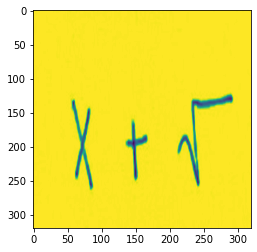

Label:  021
         xmin        ymin        xmax        ymax  confidence  class  \
1   57.713242  131.799149   86.598923  261.674927    0.892821      0   
2  137.212784  161.789307  168.342239  249.380280    0.767191      2   
0  212.016846  123.421753  292.179352  257.374084    0.926618      1   

          name  
1            x  
2    plus sign  
0  square root  
Number of predictions:  3 Prediction:  021


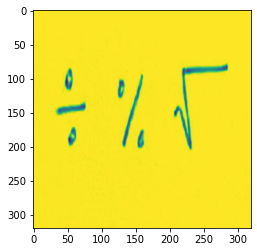

Label:  u51
         xmin       ymin        xmax        ymax  confidence  class  \
1   33.895351  85.177979   75.763962  198.951813    0.709958      4   
3   78.558052  88.333183  189.362030  202.212891    0.288704      5   
2  123.626305  93.148918  163.763397  202.297394    0.611227      5   
0  207.567490  79.086029  284.922394  204.084229    0.925864      1   

          name  
1        equal  
3      percent  
2      percent  
0  square root  
Number of predictions:  4 Prediction:  4551


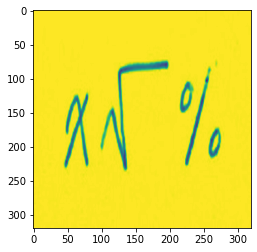

Label:  015
         xmin       ymin        xmax        ymax  confidence  class  \
1   45.520699  74.727081  268.116547  232.713409    0.430481      1   
0  216.016190  81.918793  274.659607  227.627563    0.905713      5   

          name  
1  square root  
0      percent  
Number of predictions:  2 Prediction:  15


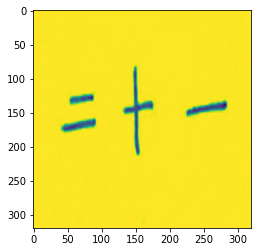

Label:  423
         xmin        ymin        xmax        ymax  confidence  class  \
1   42.385323  123.190872   91.478539  177.538193    0.904260      4   
0  133.587723   83.526886  175.883560  210.948151    0.907884      2   
2  225.319199  134.137894  284.105408  154.114487    0.703005      3   

            name  
1          equal  
0      plus sign  
2  negative sign  
Number of predictions:  3 Prediction:  423


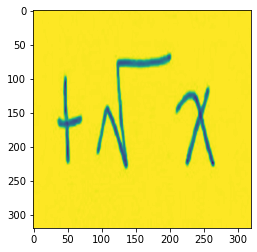

Label:  210
         xmin        ymin        xmax        ymax  confidence  class  \
1   34.772591   63.318230  258.774109  230.454041    0.650350      1   
0  212.380173  109.991974  264.575562  226.192352    0.774948      0   

          name  
1  square root  
0            x  
Number of predictions:  2 Prediction:  10


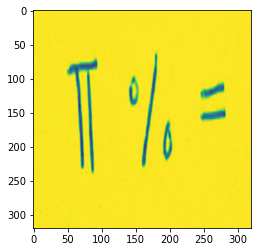

Label:  754
         xmin        ymin        xmax        ymax  confidence  class     name
1  141.372055   63.739128  202.227737  228.317474    0.877812      5  percent
0  246.112320  107.215820  282.265289  160.488159    0.898755      4    equal
Number of predictions:  2 Prediction:  54


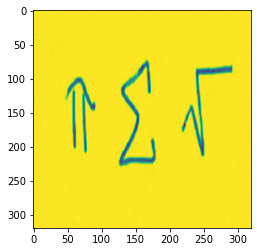

Label:  891
         xmin       ymin        xmax        ymax  confidence  class  \
2   48.688408  98.540512   91.283287  208.215836    0.470926      8   
1  104.762489  74.580315  180.014648  226.970459    0.651355      9   
0  217.978180  81.608528  291.238922  214.284149    0.920055      1   

          name  
2           pi  
1    summation  
0  square root  
Number of predictions:  3 Prediction:  891


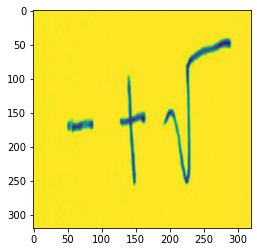

Label:  321
         xmin        ymin        xmax        ymax  confidence  class  \
2   50.931709  160.739502   89.495415  178.421173    0.272580      3   
0  124.964966   95.756729  165.227875  253.764328    0.363968      2   
1  149.766357   41.113419  287.513428  254.235367    0.300624      1   

            name  
2  negative sign  
0      plus sign  
1    square root  
Number of predictions:  3 Prediction:  321


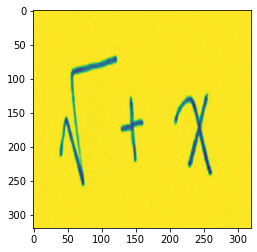

Label:  120
         xmin        ymin        xmax        ymax  confidence  class  \
1   38.156590   67.630188  158.309570  257.792480    0.609040      1   
2  129.431702  129.339584  161.493225  221.152054    0.455442      2   
0  207.858902  122.318184  261.689087  241.770844    0.923036      0   

          name  
1  square root  
2    plus sign  
0            x  
Number of predictions:  3 Prediction:  120


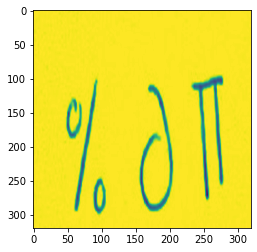

Label:  567
         xmin        ymin        xmax        ymax  confidence  class     name
0   49.414886  103.801300  103.299149  296.366425    0.862580      5  percent
1  156.820602   97.572388  282.276917  294.057251    0.323111      7  product
Number of predictions:  2 Prediction:  57


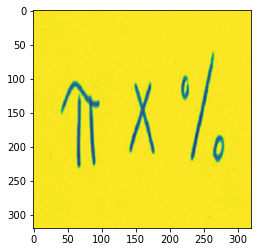

Label:  805
         xmin        ymin        xmax        ymax  confidence  class     name
1   41.668137  103.980606   96.630508  228.660416    0.808902      8       pi
2  142.951309  103.438385  177.344833  211.531708    0.387847      0        x
0  217.360809   63.862000  280.064758  221.813171    0.898767      5  percent
Number of predictions:  3 Prediction:  805


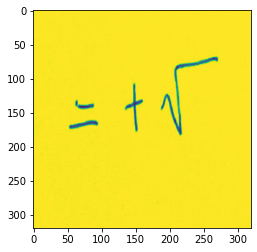

Label:  421
         xmin        ymin        xmax        ymax  confidence  class  \
0   52.975510  133.192535   94.481903  173.317047    0.904673      4   
2  135.139633  107.683556  160.903580  178.033844    0.797132      2   
1  187.382797   69.510529  270.894165  182.890793    0.815902      1   

          name  
0        equal  
2    plus sign  
1  square root  
Number of predictions:  3 Prediction:  421


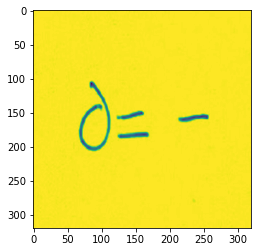

Label:  643
         xmin        ymin        xmax        ymax  confidence  class  \
0   68.042366  105.191910  167.910339  205.858658    0.822805      6   
1  214.097580  152.904602  257.528564  163.290527    0.616327      3   

            name  
0        partial  
1  negative sign  
Number of predictions:  2 Prediction:  63


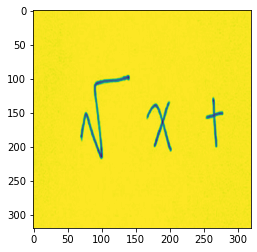

Label:  102
         xmin        ymin        xmax        ymax  confidence  class  \
0   69.112244   94.785889  141.199829  217.832886    0.890764      1   
2  167.633865  134.257080  202.262039  205.953003    0.770887      0   
1  254.304901  128.661850  278.902740  200.832199    0.857964      2   

          name  
0  square root  
2            x  
1    plus sign  
Number of predictions:  3 Prediction:  102


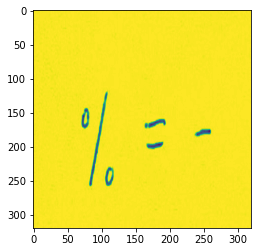

Label:  543
         xmin        ymin        xmax        ymax  confidence  class  \
0   71.520821  121.424767  116.290520  257.766235    0.870411      5   
1  165.122681  160.811142  193.535858  201.958939    0.793271      4   
2  239.082993  174.643677  260.850067  184.424072    0.481926      3   

            name  
0        percent  
1          equal  
2  negative sign  
Number of predictions:  3 Prediction:  543


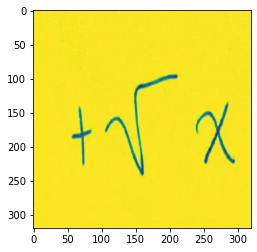

Label:  210
         xmin        ymin        xmax        ymax  confidence  class  \
1   56.629967  142.543945   85.133598  227.974609    0.776277      2   
2   86.643707   93.657837  209.367828  242.052948    0.719989      1   
0  239.744781  137.588394  294.515594  225.829453    0.911033      0   

          name  
1    plus sign  
2  square root  
0            x  
Number of predictions:  3 Prediction:  210


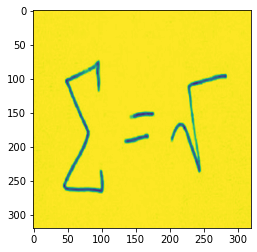

Label:  941
         xmin        ymin        xmax        ymax  confidence  class  \
0   43.417267   74.701942  101.353989  267.103943    0.914284      9   
2  134.390045  150.016998  177.006378  194.014526    0.667578      4   
1  203.515778   94.064507  283.936340  237.066101    0.913156      1   

          name  
0    summation  
2        equal  
1  square root  
Number of predictions:  3 Prediction:  941


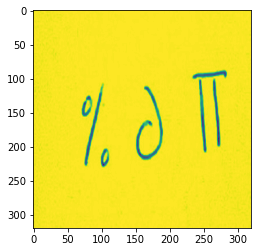

Label:  567
         xmin        ymin        xmax        ymax  confidence  class     name
2   68.478874  109.491043  186.018585  229.735001    0.354194      5  percent
0   72.839447  108.413956  107.834290  229.715164    0.800298      5  percent
1  235.785629   89.380127  283.179138  210.442139    0.636550      7  product
Number of predictions:  3 Prediction:  557


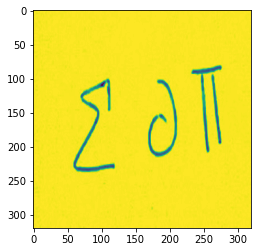

Label:  967
         xmin        ymin        xmax        ymax  confidence  class  \
0   60.171692  102.112854  117.926514  234.813812    0.930674      9   
1  169.560425   80.084656  277.652130  212.654510    0.519620      8   

        name  
0  summation  
1         pi  
Number of predictions:  2 Prediction:  98


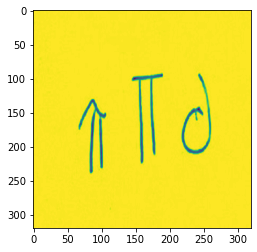

Label:  876
        xmin        ymin        xmax        ymax  confidence  class name
1  62.387978   92.049049  260.321198  232.117218    0.365368      8   pi
0  67.680618  130.378754  107.162048  235.725189    0.463202      8   pi
Number of predictions:  2 Prediction:  88


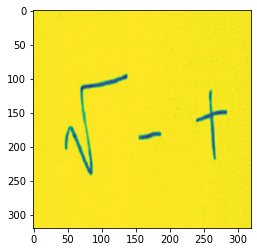

Label:  132
         xmin        ymin        xmax        ymax  confidence  class  \
1   45.896034   93.998390  144.149384  241.074402    0.845832      1   
2  155.300018  179.180756  187.281860  188.919922    0.435381      3   
0  238.783325  117.226479  284.422241  217.573364    0.904679      2   

            name  
1    square root  
2  negative sign  
0      plus sign  
Number of predictions:  3 Prediction:  132


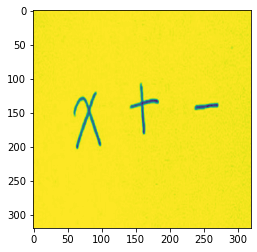

Label:  023
         xmin        ymin        xmax        ymax  confidence  class  \
1   59.431198  119.967392   98.871246  203.007217    0.905801      0   
0  142.740723  108.179581  183.762085  180.748123    0.912690      2   
2  237.889832  136.651367  271.595947  145.411804    0.570505      3   

            name  
1              x  
0      plus sign  
2  negative sign  
Number of predictions:  3 Prediction:  023


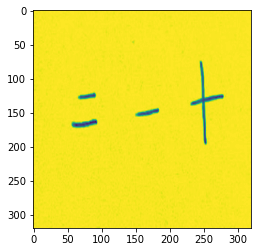

Label:  432
         xmin        ymin        xmax        ymax  confidence  class  \
2   56.169289   76.159348  282.523651  196.998337    0.274972      2   
0   57.915649  122.252960   93.538635  171.140228    0.882310      4   
1  231.551147   76.129074  279.122009  195.392136    0.860681      2   

        name  
2  plus sign  
0      equal  
1  plus sign  
Number of predictions:  3 Prediction:  242


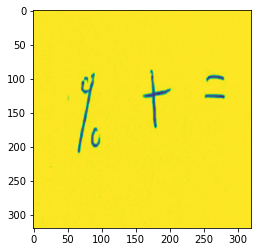

Label:  524
         xmin       ymin        xmax        ymax  confidence  class       name
2   66.138901  92.774567   96.926849  208.938507    0.865600      5    percent
0  162.362671  88.057404  201.562775  171.737183    0.905729      2  plus sign
1  252.313507  95.476845  281.567841  129.377335    0.900550      4      equal
Number of predictions:  3 Prediction:  524


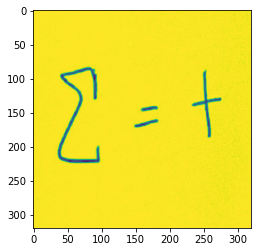

Label:  942
         xmin        ymin        xmax        ymax  confidence  class  \
0   35.878326   82.977715   97.570282  223.786682    0.933002      9   
2  149.007462  141.172928  183.456406  171.255447    0.899489      4   
1  233.792328   88.767570  275.730988  185.961090    0.913498      2   

        name  
0  summation  
2      equal  
1  plus sign  
Number of predictions:  3 Prediction:  942


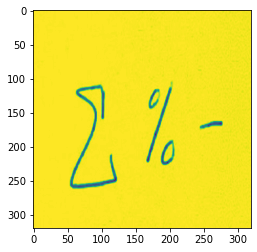

Label:  953
         xmin        ymin        xmax        ymax  confidence  class  \
0   54.395119  109.490517  119.930901  259.783875    0.906117      9   
2  166.870651  110.036865  206.382034  226.437805    0.461794      5   
1  168.363083  109.100952  253.418839  226.687042    0.732241      5   
3  246.044022  163.387924  277.420898  173.100510    0.299704      3   

            name  
0      summation  
2        percent  
1        percent  
3  negative sign  
Number of predictions:  4 Prediction:  9553


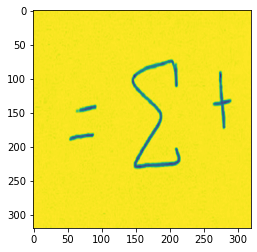

Label:  492
         xmin        ymin        xmax        ymax  confidence  class  \
1   53.996765  139.712341   91.404053  190.023224    0.901356      4   
0  144.558105   73.465187  214.583557  231.564911    0.939581      9   
2  264.531067   91.066856  290.390564  173.082977    0.847866      2   

        name  
1      equal  
0  summation  
2  plus sign  
Number of predictions:  3 Prediction:  492


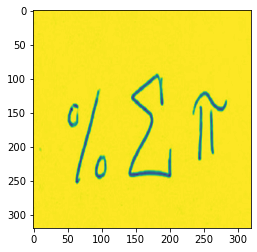

Label:  598
         xmin        ymin        xmax        ymax  confidence  class  \
0   51.059593  117.252296  104.969704  252.777893    0.914161      5   
1  142.881363   95.804016  199.624924  243.231506    0.856016      9   
2  234.725296  120.955147  283.416382  219.342102    0.756725      8   

        name  
0    percent  
1  summation  
2         pi  
Number of predictions:  3 Prediction:  598


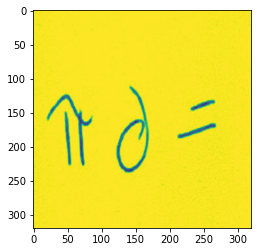

Label:  864
         xmin        ymin        xmax        ymax  confidence  class     name
1   21.638912  118.891937   86.202148  232.938904    0.799471      8       pi
2  125.699463  112.964638  167.505493  235.419861    0.535722      6  partial
0  214.090866  132.188797  267.047241  186.562485    0.891771      4    equal
Number of predictions:  3 Prediction:  864


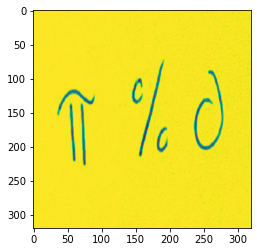

Label:  856
         xmin        ymin        xmax        ymax  confidence  class     name
2   35.545067  114.111176   88.455505  226.353699    0.807989      8       pi
0  145.657242   74.785309  194.996750  215.310760    0.881283      5  percent
1  238.905228   87.214180  277.846008  205.163269    0.808060      6  partial
Number of predictions:  3 Prediction:  856


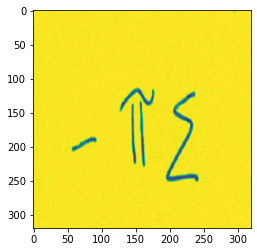

Label:  389
        xmin        ymin       xmax        ymax  confidence  class name
0  56.454201  113.738747  244.24054  249.363953    0.829398      8   pi
Number of predictions:  1 Prediction:  8


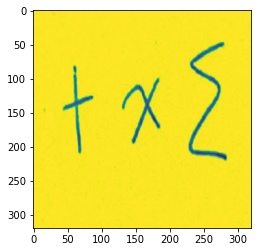

Label:  209
         xmin        ymin        xmax        ymax  confidence  class  \
0   44.004654   81.426712   88.341782  208.631943    0.892002      2   
1  131.015396  100.117142  185.731461  195.188187    0.837593      0   
2  228.694748   47.198608  284.124451  219.253479    0.664038      9   

        name  
0  plus sign  
1          x  
2  summation  
Number of predictions:  3 Prediction:  209


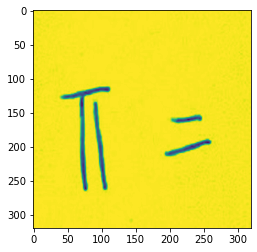

Label:  74
         xmin        ymin        xmax        ymax  confidence  class     name
1   42.702511  111.693016  112.334808  264.215454    0.699807      7  product
0  193.277344  154.426361  260.861420  213.512695    0.918134      4    equal
Number of predictions:  2 Prediction:  74


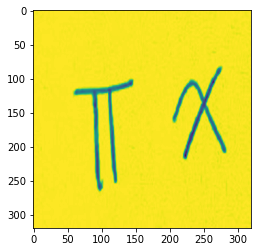

Label:  70
         xmin        ymin        xmax        ymax  confidence  class     name
1   60.774921  101.159409  146.065140  263.996704    0.782685      7  product
0  205.683502   82.951302  283.219055  217.643585    0.945515      0        x
Number of predictions:  2 Prediction:  70


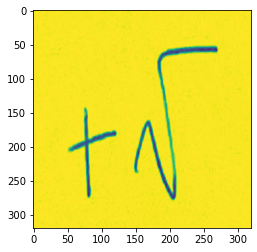

Label:  21
         xmin        ymin        xmax        ymax  confidence  class  \
0   52.707691  144.404648  122.414154  274.355286    0.866351      2   
1  148.667648   51.822159  269.760132  280.726318    0.537620      1   

          name  
0    plus sign  
1  square root  
Number of predictions:  2 Prediction:  21


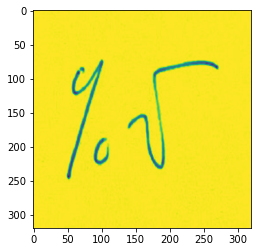

Label:  51
         xmin       ymin        xmax        ymax  confidence  class  \
1   50.846367  71.621277  107.250648  245.532074    0.834852      5   
0  139.882385  74.494934  271.877899  231.955475    0.849266      1   

          name  
1      percent  
0  square root  
Number of predictions:  2 Prediction:  51


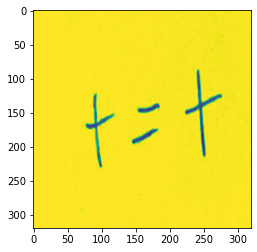

Label:  242
         xmin        ymin        xmax        ymax  confidence  class  \
1   77.583794  122.931610  117.114571  229.585846    0.736775      2   
2  146.654861  137.261032  185.648087  195.109818    0.569855      4   
0  223.970505   88.934845  276.039246  213.080780    0.881642      2   

        name  
1  plus sign  
2      equal  
0  plus sign  
Number of predictions:  3 Prediction:  242


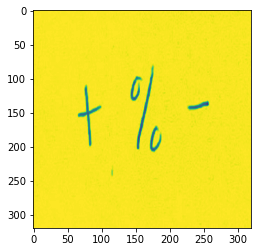

Label:  253
         xmin        ymin        xmax        ymax  confidence  class  \
0   66.425323  111.409698   98.680588  198.029236    0.871848      2   
1  144.522614   81.597046  214.195526  207.845642    0.587031      5   
2  228.822510  134.613098  256.916931  144.823975    0.389397      3   

            name  
0      plus sign  
1        percent  
2  negative sign  
Number of predictions:  3 Prediction:  253


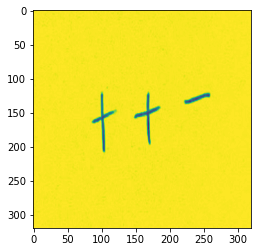

Label:  223
         xmin        ymin        xmax        ymax  confidence  class  \
0   86.360901  121.542435  120.995010  206.210098    0.784831      2   
1  149.099960  121.910110  185.388290  196.938095    0.744036      2   
2  222.126602  121.421486  258.770569  137.242981    0.304201      3   

            name  
0      plus sign  
1      plus sign  
2  negative sign  
Number of predictions:  3 Prediction:  223


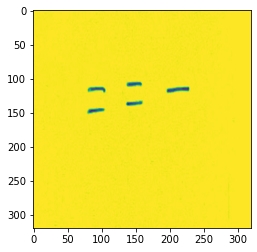

Label:  443
         xmin        ymin        xmax        ymax  confidence  class  \
0   80.594933  113.083015  105.939629  150.229553    0.877688      4   
1  137.039566  106.540573  160.538834  138.927689    0.861620      4   
2  196.647400  112.955185  229.130615  120.697418    0.479926      3   

            name  
0          equal  
1          equal  
2  negative sign  
Number of predictions:  3 Prediction:  443


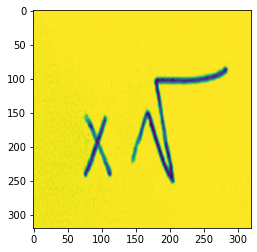

Label:  01
         xmin        ymin        xmax        ymax  confidence  class  \
1   75.057487  153.871246  114.596352  243.706146    0.855953      0   
0  147.292267   81.685921  284.746368  253.247375    0.880770      1   

          name  
1            x  
0  square root  
Number of predictions:  2 Prediction:  01


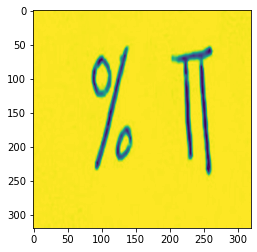

Label:  577
         xmin       ymin        xmax        ymax  confidence  class     name
0   85.783737  53.126442  144.453842  232.144196    0.928105      5  percent
1  205.772629  54.051346  263.559753  239.536331    0.813369      7  product
Number of predictions:  2 Prediction:  57


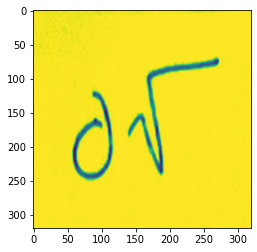

Label:  61
        xmin       ymin        xmax        ymax  confidence  class  \
0  58.672272  69.702461  269.827118  243.490967     0.77497      1   

          name  
0  square root  
Number of predictions:  1 Prediction:  1


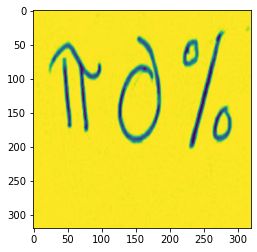

Label:  865
         xmin       ymin        xmax        ymax  confidence  class     name
1   15.473343  35.507683  289.132019  200.215576    0.583493      5  percent
3   20.311340  38.276016  290.282837  197.606995    0.304206      8       pi
2   24.174583  44.720337  109.675713  188.692337    0.358248      8       pi
0  221.675049  31.696342  290.106354  201.764587    0.760064      5  percent
Number of predictions:  4 Prediction:  5885


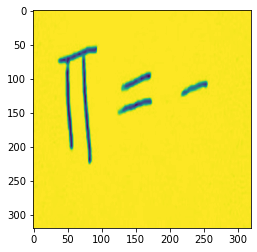

Label:  743
         xmin        ymin        xmax        ymax  confidence  class  \
2   39.341862   52.514664   91.577301  222.822403    0.384417      7   
0  126.932610   92.180862  173.422729  151.602814    0.776839      4   
1  218.691757  104.066307  255.680283  125.261635    0.521226      3   

            name  
2        product  
0          equal  
1  negative sign  
Number of predictions:  3 Prediction:  743


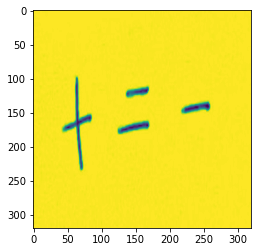

Label:  243
         xmin        ymin        xmax        ymax  confidence  class  \
1   43.721310   98.799980   85.364868  233.857941    0.859595      2   
0  125.366951  112.599503  170.182404  179.628098    0.892794      4   
2  219.759964  135.259781  259.114075  150.246170    0.579431      3   

            name  
1      plus sign  
0          equal  
2  negative sign  
Number of predictions:  3 Prediction:  243


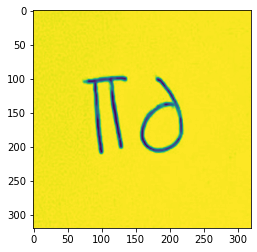

Label:  76
        xmin       ymin        xmax       ymax  confidence  class     name
0  75.736443  97.084717  220.290375  209.83844    0.476572      7  product
1  77.089378  97.307877  218.917358  209.93187    0.433633      8       pi
Number of predictions:  2 Prediction:  78


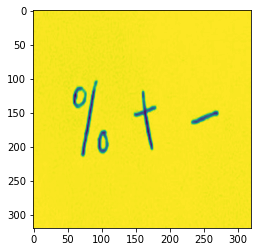

Label:  523
         xmin        ymin        xmax        ymax  confidence  class  \
0   58.277363  103.403503  106.647812  213.365356    0.888047      5   
2  148.843979  117.952690  180.508835  204.395752    0.562332      2   
1  233.248840  148.573547  272.192169  166.041016    0.607453      3   

            name  
0        percent  
2      plus sign  
1  negative sign  
Number of predictions:  3 Prediction:  523


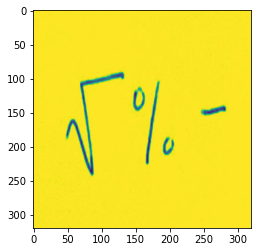

Label:  153
         xmin        ymin        xmax        ymax  confidence  class  \
2   49.634827   91.165855  189.956696  241.256958    0.394574      1   
3   86.954147   93.050468  220.507584  236.526825    0.303154      5   
0  146.438095  104.544296  204.535782  225.868546    0.747409      5   
1  247.695602  140.821457  282.604004  152.951645    0.694287      3   

            name  
2    square root  
3        percent  
0        percent  
1  negative sign  
Number of predictions:  4 Prediction:  1553


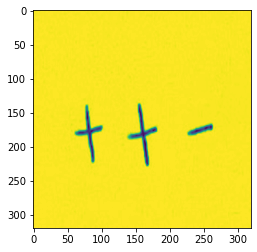

Label:  223
         xmin        ymin        xmax        ymax  confidence  class  \
0   63.029587  139.719208  101.367447  222.665436    0.890084      2   
1  140.636047  137.317474  180.766357  227.410492    0.797345      2   
2  228.412308  167.680099  263.285797  182.813950    0.468168      3   

            name  
0      plus sign  
1      plus sign  
2  negative sign  
Number of predictions:  3 Prediction:  223


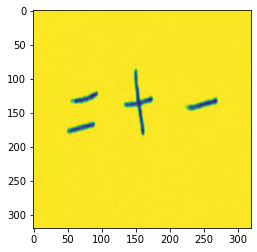

Label:  423
         xmin        ymin        xmax        ymax  confidence  class  \
1   51.037334  120.115593   93.943909  179.347305    0.877990      4   
0  134.095840   87.915405  174.885971  181.305054    0.889878      2   
2  226.338425  129.107101  270.560211  146.496964    0.603354      3   

            name  
1          equal  
0      plus sign  
2  negative sign  
Number of predictions:  3 Prediction:  423


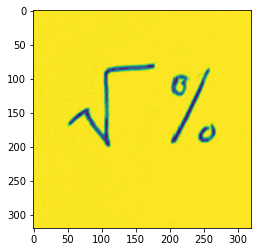

Label:  15
         xmin       ymin        xmax        ymax  confidence  class  \
1   52.867153  78.934967  176.568542  198.883820    0.848249      1   
0  202.160019  85.827660  267.529541  195.430756    0.894015      5   

          name  
1  square root  
0      percent  
Number of predictions:  2 Prediction:  15


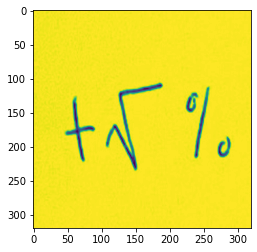

Label:  215
         xmin        ymin        xmax        ymax  confidence  class  \
2   45.261612  106.754135  216.332657  233.106949    0.420498      1   
1   48.982117  128.518585   90.235931  220.958405    0.763305      2   
0  224.874832  111.965515  289.339508  217.767944    0.899875      5   

          name  
2  square root  
1    plus sign  
0      percent  
Number of predictions:  3 Prediction:  125


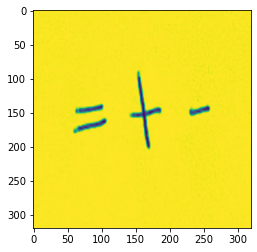

Label:  423
         xmin        ymin        xmax        ymax  confidence  class  \
0   61.205170  138.557693  106.568329  179.313187    0.876686      4   
1  143.332718   92.930206  188.209305  201.800140    0.793885      2   
2  230.480469  140.338242  258.110107  154.080246    0.439870      3   

            name  
0          equal  
1      plus sign  
2  negative sign  
Number of predictions:  3 Prediction:  423


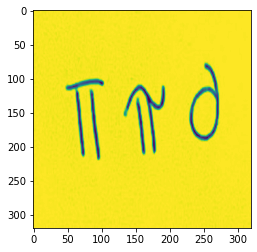

Label:  786
        xmin       ymin        xmax        ymax  confidence  class name
0  65.306175  77.497978  271.578033  213.718994    0.699984      8   pi
Number of predictions:  1 Prediction:  8


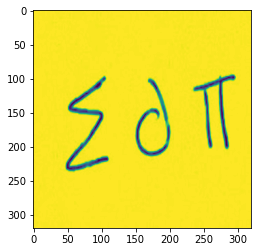

Label:  967
         xmin       ymin        xmax        ymax  confidence  class       name
0   48.487408  96.278725  110.218155  234.773132    0.928988      9  summation
1  236.542389  95.360947  296.012115  203.278427    0.560946      7    product
Number of predictions:  2 Prediction:  97


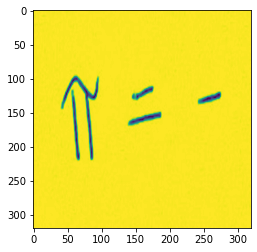

Label:  843
         xmin        ymin        xmax        ymax  confidence  class  \
1   41.976562   97.062546   95.007156  219.427322    0.875035      8   
0  140.873962  112.109978  187.431396  168.352020    0.886766      4   
2  243.384064  120.412796  275.077789  136.301529    0.672403      3   

            name  
1             pi  
0          equal  
2  negative sign  
Number of predictions:  3 Prediction:  843


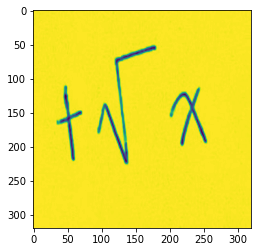

Label:  210
         xmin        ymin        xmax        ymax  confidence  class  \
2   35.387146   51.096970  234.503174  224.933090    0.296033      1   
1   36.718952  112.667114   71.421417  220.411743    0.767458      2   
0  202.716873  115.512878  253.720810  198.640137    0.867209      0   

          name  
2  square root  
1    plus sign  
0            x  
Number of predictions:  3 Prediction:  120


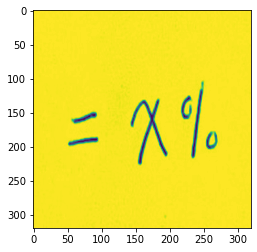

Label:  405
         xmin        ymin        xmax        ymax  confidence  class     name
0   52.130283  150.544708   94.551483  198.021027    0.906205      4    equal
1  143.077209  106.328400  264.656921  226.017212    0.779559      0        x
4  143.095093  129.276520  196.614410  226.482361    0.318813      0        x
2  143.651398  105.404709  268.383942  224.105820    0.759149      5  percent
3  218.007492  109.002060  269.901703  218.631241    0.706081      5  percent
Number of predictions:  5 Prediction:  40055


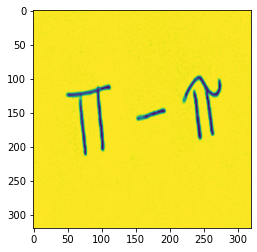

Label:  738
         xmin        ymin        xmax        ymax  confidence  class     name
2   40.524216   95.973747  283.920593  206.295776    0.314004      7  product
1   49.806747  108.913879  112.707184  212.215118    0.676612      7  product
0  188.573517   96.121124  275.134766  188.800018    0.720426      8       pi
Number of predictions:  3 Prediction:  778


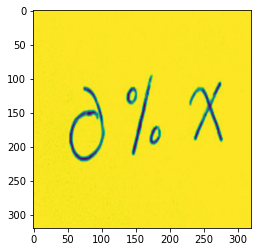

Label:  650
         xmin        ymin        xmax        ymax  confidence  class     name
1   58.104355   94.116882  189.743698  219.312164    0.739386      5  percent
2  133.035461   94.631805  185.729309  215.065826    0.432131      5  percent
0  230.111633  104.313828  277.157440  193.502762    0.914905      0        x
Number of predictions:  3 Prediction:  550


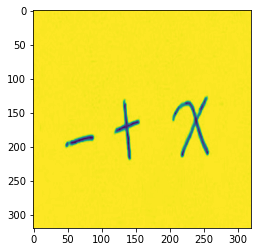

Label:  320
         xmin        ymin        xmax        ymax  confidence  class  \
2   68.368362  132.211960  156.223679  218.225815    0.671404      2   
1  121.077438  132.910812  155.483078  217.762924    0.685384      2   
0  205.332199  127.821198  258.263000  214.692719    0.917570      0   

        name  
2  plus sign  
1  plus sign  
0          x  
Number of predictions:  3 Prediction:  220


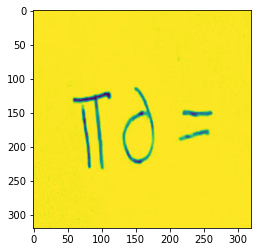

Label:  764
         xmin        ymin        xmax        ymax  confidence  class   name
1   59.121017  116.056664  176.279968  232.395294    0.753352      8     pi
0  215.742340  146.775131  262.516083  189.033218    0.902436      4  equal
Number of predictions:  2 Prediction:  84


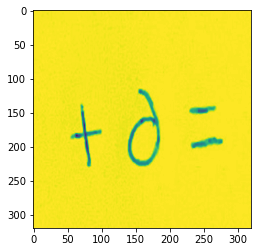

Label:  264
         xmin        ymin        xmax        ymax  confidence  class  \
0   58.048210  140.059296   99.178505  228.060028    0.914656      2   
2  140.440430  116.577583  184.096741  226.224762    0.877904      6   
1  229.870483  140.301483  277.845428  202.682037    0.903091      4   

        name  
0  plus sign  
2    partial  
1      equal  
Number of predictions:  3 Prediction:  264


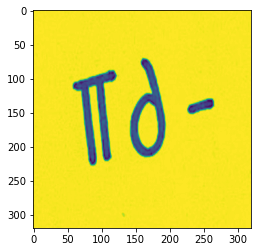

Label:  763
        xmin       ymin        xmax        ymax  confidence  class name
0  59.906776  71.045746  260.695343  225.493866    0.590046      8   pi
Number of predictions:  1 Prediction:  8


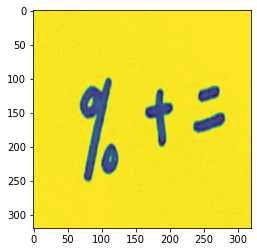

Label:  524
         xmin        ymin        xmax        ymax  confidence  class  \
0   69.861755   99.949287  121.951477  250.376587    0.892632      5   
2  166.238251  116.678146  203.787964  198.103775    0.623828      2   
3  167.197342  111.410110  282.434692  198.097214    0.528700      4   
1  236.891068  111.749832  280.723297  178.658615    0.647734      4   

        name  
0    percent  
2  plus sign  
3      equal  
1      equal  
Number of predictions:  4 Prediction:  5244


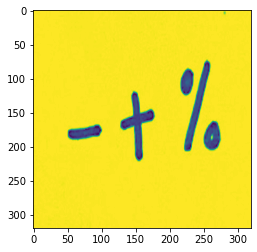

Label:  325
         xmin        ymin        xmax        ymax  confidence  class  \
1   48.717239   92.168968  264.584045  222.738708    0.490890      2   
2  128.971497   81.593803  273.315887  219.521423    0.343270      5   
3  129.844833  115.413681  177.500046  219.085770    0.261222      2   
0  217.499313   74.362022  273.354889  208.308594    0.785525      5   

        name  
1  plus sign  
2    percent  
3  plus sign  
0    percent  
Number of predictions:  4 Prediction:  2525


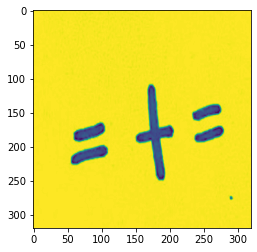

Label:  424
         xmin        ymin        xmax        ymax  confidence  class  \
0   56.541237  165.797577  108.302315  225.464020    0.861500      4   
2  147.295288  111.480240  208.787354  248.064072    0.632152      2   
1  234.434113  138.619568  279.205292  192.695404    0.766748      4   

        name  
0      equal  
2  plus sign  
1      equal  
Number of predictions:  3 Prediction:  424


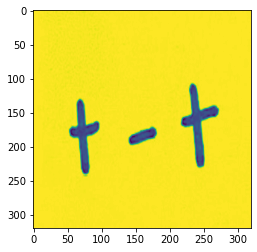

Label:  232
         xmin        ymin        xmax        ymax  confidence  class  \
0   54.461082  131.380585   96.196724  239.473450    0.820617      2   
2   56.373398  108.818024  273.796875  234.309601    0.661024      2   
1  214.647552  108.388634  271.665558  228.571747    0.799702      2   

        name  
0  plus sign  
2  plus sign  
1  plus sign  
Number of predictions:  3 Prediction:  222


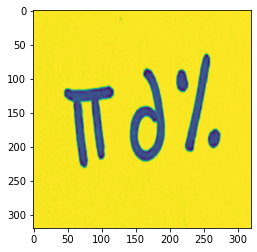

Label:  865
        xmin      ymin      xmax      ymax  confidence  class     name
0  59.227219  63.32888  274.9823  225.7005    0.583444      5  percent
Number of predictions:  1 Prediction:  5


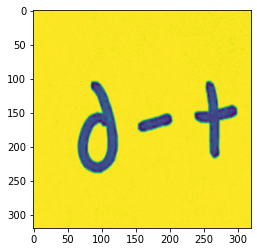

Label:  632
         xmin        ymin        xmax        ymax  confidence  class  \
1   66.760597  104.618256  183.443085  238.220703    0.639876      6   
3   67.440613  107.419563  118.746185  235.676758    0.250108      6   
2   68.800842  102.913162  300.196594  230.010056    0.275044      2   
0  239.993073  105.354019  298.804291  216.306717    0.821111      2   

        name  
1    partial  
3    partial  
2  plus sign  
0  plus sign  
Number of predictions:  4 Prediction:  6622


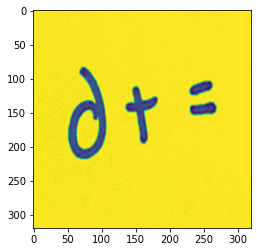

Label:  624
         xmin        ymin        xmax        ymax  confidence  class  \
2   51.740135   83.431747  183.255280  217.455673    0.305248      6   
4   52.358826   83.116783  190.486908  218.131653    0.269322      2   
1   54.694687   83.076553  181.415512  218.117508    0.506385      5   
3  136.730576  110.883026  181.888565  197.432648    0.274165      2   
0  230.227753  104.720520  268.012634  152.448853    0.920361      4   

        name  
2    partial  
4  plus sign  
1    percent  
3  plus sign  
0      equal  
Number of predictions:  5 Prediction:  62524


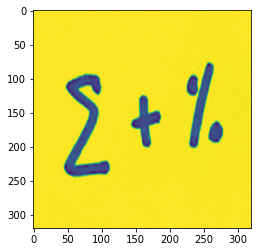

Label:  925
         xmin        ymin        xmax        ymax  confidence  class  \
0   45.852932   93.931305  110.282562  241.360077    0.834195      9   
3  145.109528  126.466965  186.768036  199.081192    0.490682      2   
2  169.453247   77.392593  274.329437  201.604019    0.794289      5   
1  226.001953   77.742584  277.722229  200.702240    0.811765      5   

        name  
0  summation  
3  plus sign  
2    percent  
1    percent  
Number of predictions:  4 Prediction:  9255


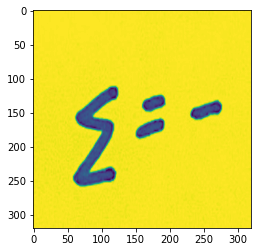

Label:  943
        xmin        ymin        xmax        ymax  confidence  class       name
0  59.090439  111.995705  152.012421  256.505341    0.786094      9  summation
Number of predictions:  1 Prediction:  9


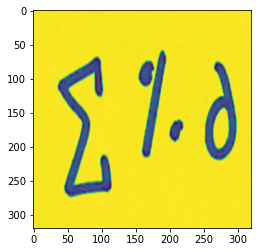

Label:  956
         xmin       ymin        xmax        ymax  confidence  class       name
0   35.070919  69.535629  112.422440  271.118286    0.911243      9  summation
1  154.279709  59.316414  224.748734  216.569580    0.671517      5    percent
2  256.472076  70.415070  297.236115  219.069977    0.629666      6    partial
Number of predictions:  3 Prediction:  956


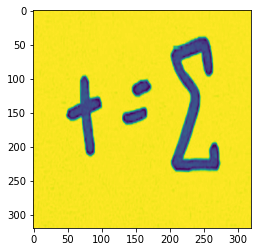

Label:  249
         xmin       ymin        xmax        ymax  confidence  class       name
0   50.320591  96.704559   98.967667  212.118439    0.811678      2  plus sign
1  136.321350  39.648224  273.883545  235.276947    0.555162      9  summation
Number of predictions:  2 Prediction:  29


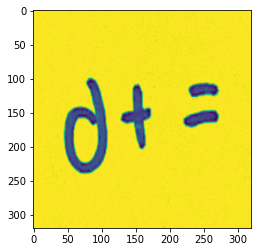

Label:  624
         xmin        ymin        xmax        ymax  confidence  class     name
1   47.894829  100.872856  172.520752  237.508270    0.706595      5  percent
0  223.029510  107.927010  271.840179  170.251556    0.901415      4    equal
Number of predictions:  2 Prediction:  54


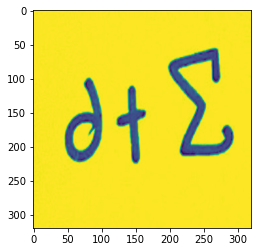

Label:  629
         xmin       ymin        xmax        ymax  confidence  class       name
1   49.513550  99.700005  122.849854  222.296539    0.608943      6    partial
0  199.857132  56.521675  293.297821  214.652588    0.925931      9  summation
Number of predictions:  2 Prediction:  69


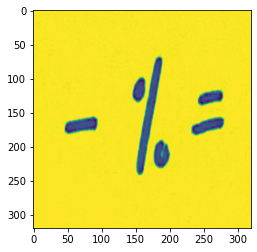

Label:  354
         xmin        ymin        xmax        ymax  confidence  class  \
2   47.090233  157.199341   93.874107  180.191254    0.504319      3   
1  108.203918   69.409866  209.280853  239.782974    0.743746      5   
3  145.757019   65.900452  277.277527  236.672455    0.428485      5   
0  234.420853  119.394661  279.341858  180.932388    0.791259      4   

            name  
2  negative sign  
1        percent  
3        percent  
0          equal  
Number of predictions:  4 Prediction:  3554


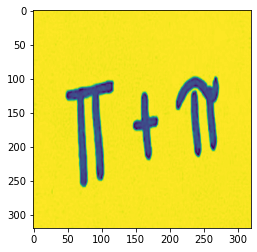

Label:  728
         xmin        ymin        xmax        ymax  confidence  class     name
1   46.194679  103.104179  166.003479  258.647736    0.281803      7  product
0  176.903198   97.970474  270.650146  216.301437    0.522636      8       pi
Number of predictions:  2 Prediction:  78


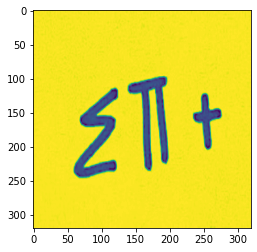

Label:  972
         xmin        ymin        xmax        ymax  confidence  class  \
0   59.676338  112.149162  123.003563  244.454285    0.817371      9   
2   61.574120   97.760597  275.961945  236.116180    0.334691      7   
1  236.029434  122.576790  276.186646  204.684143    0.774681      2   

        name  
0  summation  
2    product  
1  plus sign  
Number of predictions:  3 Prediction:  972


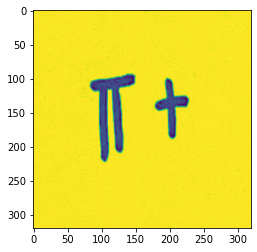

Label:  72
         xmin        ymin        xmax        ymax  confidence  class  \
0   84.181664   94.717392  226.840973  222.533066    0.816783      7   
1  179.839523  100.032944  227.405441  187.787003    0.754405      2   

        name  
0    product  
1  plus sign  
Number of predictions:  2 Prediction:  72


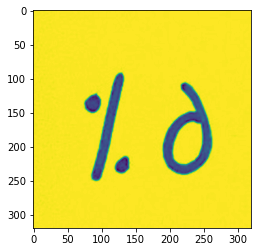

Label:  56
         xmin        ymin        xmax        ymax  confidence  class     name
0   75.706856   93.671646  139.172195  248.779953    0.929515      5  percent
1  191.323944  106.428810  261.672150  239.943390    0.883718      6  partial
Number of predictions:  2 Prediction:  56


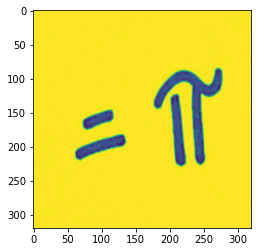

Label:  48
         xmin        ymin        xmax        ymax  confidence  class   name
1   62.107262  147.191223  133.837891  218.291382    0.902124      4  equal
0  178.038574   85.450439  276.474213  227.171082    0.931401      8     pi
Number of predictions:  2 Prediction:  48


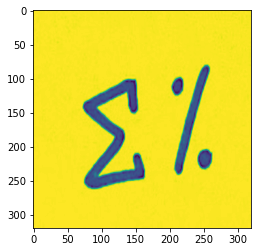

Label:  95
         xmin        ymin        xmax        ymax  confidence  class  \
0   72.897285  101.289841  161.817596  261.968506    0.940540      9   
1  204.385040   81.291634  261.145721  239.663086    0.895914      5   

        name  
0  summation  
1    percent  
Number of predictions:  2 Prediction:  95


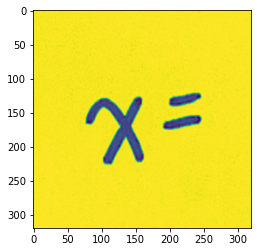

Label:  04
         xmin        ymin        xmax        ymax  confidence  class   name
1   79.067047  127.388184  163.455551  224.731750    0.880154      0      x
0  192.740173  122.310211  246.768829  173.874237    0.883860      4  equal
Number of predictions:  2 Prediction:  04


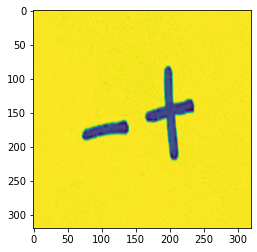

Label:  32
         xmin       ymin        xmax        ymax  confidence  class       name
0  106.549805  82.687584  236.259827  219.879242    0.846944      2  plus sign
Number of predictions:  1 Prediction:  2


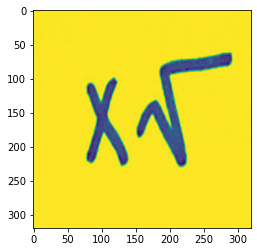

Label:  01
        xmin       ymin        xmax        ymax  confidence  class  \
0  78.194168  62.096748  290.456543  229.440247    0.830648      1   
1  78.383003  63.257080  289.363953  229.607605    0.394739      0   
2  78.469818  99.193474  137.096848  227.891083    0.363392      0   

          name  
0  square root  
1            x  
2            x  
Number of predictions:  3 Prediction:  100


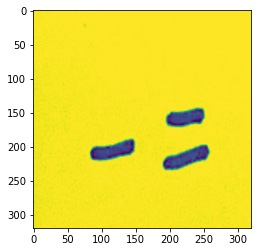

Label:  34
         xmin        ymin        xmax        ymax  confidence  class  \
2   83.569283  143.482208  257.881104  232.337097    0.411266      4   
1   83.954010  189.303909  149.135803  219.000504    0.485942      3   
0  191.517990  144.730789  258.002319  233.666550    0.786798      4   

            name  
2          equal  
1  negative sign  
0          equal  
Number of predictions:  3 Prediction:  434


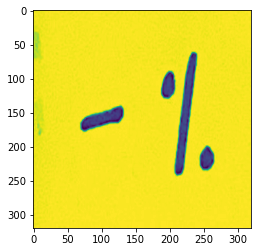

Label:  35
         xmin        ymin        xmax        ymax  confidence  class  \
2   69.850662  140.794235  132.867065  175.665237    0.292462      3   
0   72.465439   60.816025  263.135681  241.973434    0.851086      5   
1  188.191910   62.070908  264.523438  241.849106    0.796135      5   

            name  
2  negative sign  
0        percent  
1        percent  
Number of predictions:  3 Prediction:  355


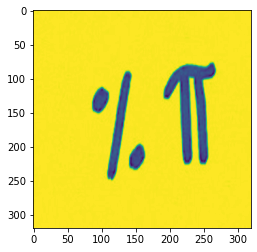

Label:  58
         xmin       ymin        xmax        ymax  confidence  class     name
0   86.844452  90.449478  162.161438  246.793930    0.909284      5  percent
1  193.843506  77.615433  266.687073  231.003098    0.679142      8       pi
Number of predictions:  2 Prediction:  58


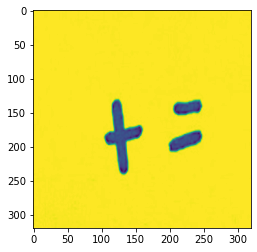

Label:  24
         xmin        ymin        xmax        ymax  confidence  class  \
0  105.851250  131.681351  159.607864  239.519028    0.912331      2   
1  200.343246  132.042343  247.471695  206.814102    0.878003      4   

        name  
0  plus sign  
1      equal  
Number of predictions:  2 Prediction:  24


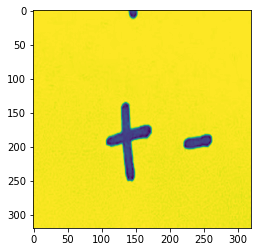

Label:  23
         xmin        ymin        xmax        ymax  confidence  class  \
0  107.468498  135.591125  173.167572  249.975494    0.908382      2   
2  108.569618  135.402161  261.058014  250.580353    0.299883      2   
1  221.356949  183.097687  262.010010  202.874573    0.325238      3   

            name  
0      plus sign  
2      plus sign  
1  negative sign  
Number of predictions:  3 Prediction:  223


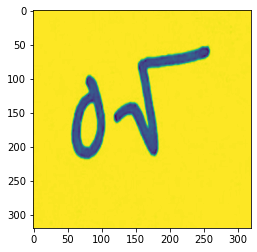

Label:  61
        xmin       ymin        xmax        ymax  confidence  class  \
0  59.836647  51.282448  259.236176  214.058411    0.915744      1   

          name  
0  square root  
Number of predictions:  1 Prediction:  1


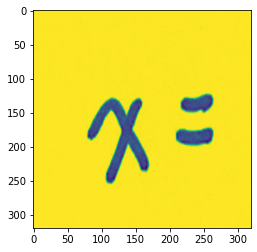

Label:  04
         xmin        ymin        xmax        ymax  confidence  class   name
0   80.933998  129.185852  168.447418  253.248291    0.913249      0      x
1  211.908920  124.515137  264.689117  196.405182    0.896702      4  equal
Number of predictions:  2 Prediction:  04


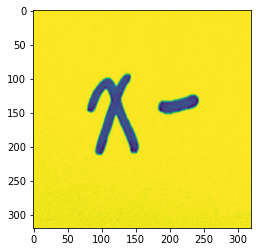

Label:  03
        xmin       ymin        xmax        ymax  confidence  class name
0  80.612511  94.180229  160.204773  211.187622    0.853682      0    x
Number of predictions:  1 Prediction:  0


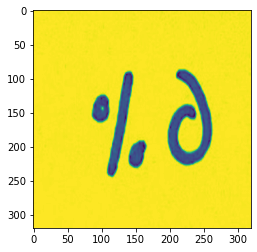

Label:  56
         xmin       ymin        xmax        ymax  confidence  class     name
1   85.305473  88.060905  259.125122  243.702362    0.447574      5  percent
0   86.751724  91.439644  163.214920  242.550568    0.890007      5  percent
2  199.924927  87.110741  261.851990  228.978119    0.372900      6  partial
Number of predictions:  3 Prediction:  556


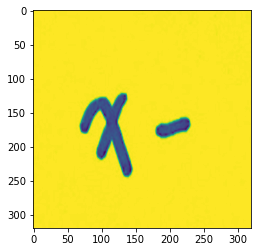

Label:  03
        xmin        ymin        xmax        ymax  confidence  class name
1  67.111671  121.265549  230.038605  243.649460    0.692101      0    x
0  69.959412  121.530258  143.636917  242.718613    0.847943      0    x
Number of predictions:  2 Prediction:  00


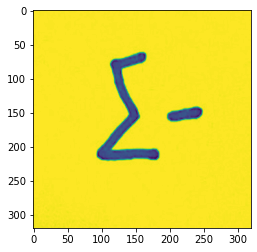

Label:  93
       xmin       ymin        xmax        ymax  confidence  class       name
0  93.01915  61.551064  247.349594  219.394623    0.931443      9  summation
Number of predictions:  1 Prediction:  9


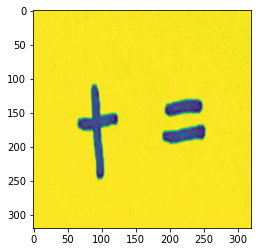

Label:  24
         xmin        ymin        xmax        ymax  confidence  class  \
1   65.755646  109.478485  123.751907  246.676514    0.907469      2   
0  190.473907  131.496506  251.917999  194.147690    0.923253      4   

        name  
1  plus sign  
0      equal  
Number of predictions:  2 Prediction:  24


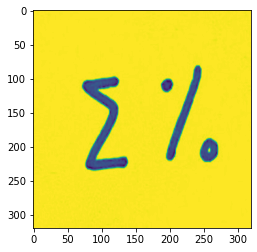

Label:  95
         xmin       ymin        xmax        ymax  confidence  class       name
1   72.194611  97.924301  137.770508  233.129898    0.932058      9  summation
0  188.191498  81.769753  271.269775  221.689178    0.932273      5    percent
Number of predictions:  2 Prediction:  95


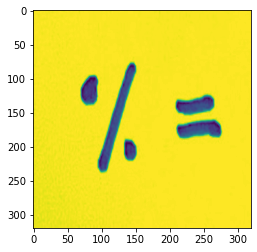

Label:  54
         xmin        ymin        xmax        ymax  confidence  class     name
0   69.862000   76.830795  151.465759  235.915909    0.939089      5  percent
1  209.818161  125.950447  275.839630  187.093811    0.923013      4    equal
Number of predictions:  2 Prediction:  54


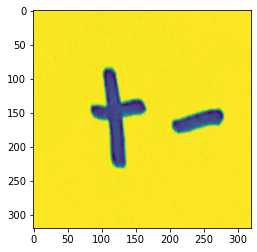

Label:  23
         xmin        ymin        xmax        ymax  confidence  class  \
0   85.262306   85.274178  165.174530  229.413727    0.945357      2   
1  203.913910  145.738281  278.057983  179.196930    0.440962      3   

            name  
0      plus sign  
1  negative sign  
Number of predictions:  2 Prediction:  23


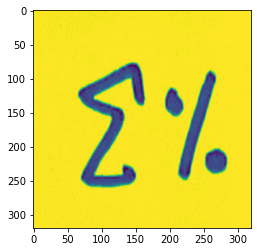

Label:  95
         xmin       ymin        xmax        ymax  confidence  class       name
1   65.791809  77.476967  164.254944  257.408722    0.868311      9  summation
0  196.722046  88.925285  283.603119  247.337036    0.893952      5    percent
Number of predictions:  2 Prediction:  95


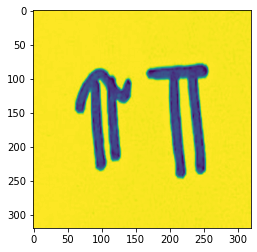

Label:  87
        xmin       ymin        xmax        ymax  confidence  class name
1  61.359612  78.942345  258.270813  245.111145    0.358790      8   pi
0  61.789738  84.155724  142.127716  237.736420    0.789061      8   pi
Number of predictions:  2 Prediction:  88


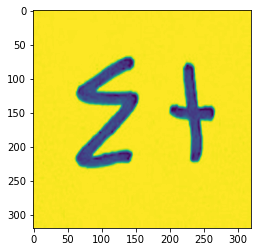

Label:  92
         xmin       ymin        xmax        ymax  confidence  class       name
1   61.953655  68.583717  153.878250  229.894379    0.923288      9  summation
0  201.732925  77.417809  266.500702  221.563324    0.945033      2  plus sign
Number of predictions:  2 Prediction:  92


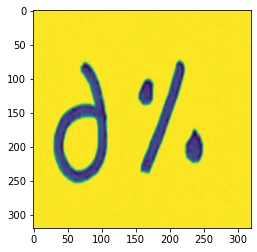

Label:  65
         xmin       ymin        xmax        ymax  confidence  class     name
1   29.734085  75.016693  247.109299  250.923462    0.586453      5  percent
2   30.197716  77.310440  106.882057  250.515244    0.566617      6  partial
0  155.595947  75.355553  248.669281  239.358337    0.885408      5  percent
Number of predictions:  3 Prediction:  565


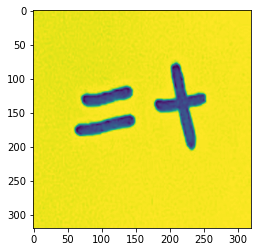

Label:  42
         xmin        ymin       xmax        ymax  confidence  class       name
1   61.548672  112.714691  147.58606  182.908112    0.909976      4      equal
0  178.966843   77.929153  253.00264  204.022018    0.926039      2  plus sign
Number of predictions:  2 Prediction:  42


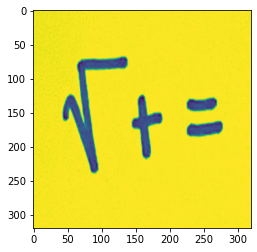

Label:  124
         xmin        ymin        xmax        ymax  confidence  class  \
2   45.141266   68.224739  183.402039  236.733063    0.459856      1   
1  145.329407  125.078613  189.442444  217.666870    0.740028      2   
0  225.355087  128.828033  277.931152  184.137085    0.921287      4   

          name  
2  square root  
1    plus sign  
0        equal  
Number of predictions:  3 Prediction:  124


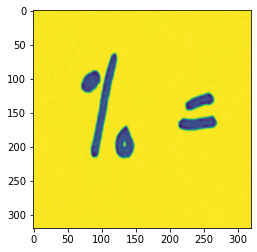

Label:  54
         xmin        ymin        xmax        ymax  confidence  class     name
0   70.818802   64.145546  147.670425  217.860077    0.951937      5  percent
1  214.500946  121.562012  268.443451  174.677032    0.900977      4    equal
Number of predictions:  2 Prediction:  54


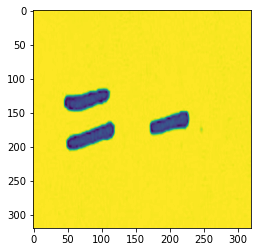

Label:  43
         xmin        ymin        xmax        ymax  confidence  class  \
0   45.870159  115.218460  118.873276  204.065445    0.924688      4   
1  173.215439  148.337204  227.511765  181.806198    0.716416      3   

            name  
0          equal  
1  negative sign  
Number of predictions:  2 Prediction:  43


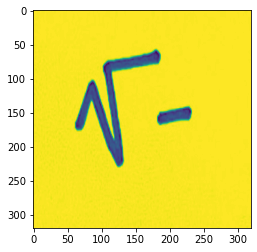

Label:  13
        xmin       ymin       xmax        ymax  confidence  class         name
0  63.068672  58.645805  230.29895  228.859619    0.936054      1  square root
Number of predictions:  1 Prediction:  1


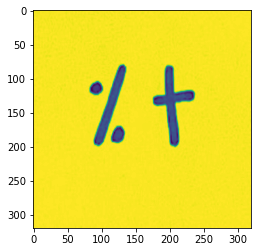

Label:  52
         xmin       ymin        xmax        ymax  confidence  class       name
1   83.217125  81.210045  134.795685  197.586029    0.902877      5    percent
0  176.756195  81.768677  236.479828  199.437347    0.913451      2  plus sign
Number of predictions:  2 Prediction:  52


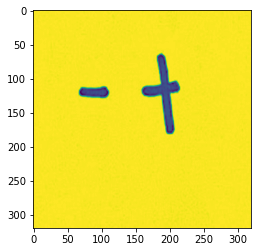

Label:  32
         xmin        ymin        xmax        ymax  confidence  class  \
1   66.845367   64.264206  216.135773  182.390274    0.696506      2   
2   68.668518  112.498238  111.367996  127.893700    0.344905      3   
0  160.240250   64.805428  215.153885  180.690552    0.859651      2   

            name  
1      plus sign  
2  negative sign  
0      plus sign  
Number of predictions:  3 Prediction:  232


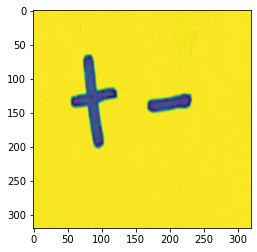

Label:  23
         xmin        ymin        xmax        ymax  confidence  class  \
0   55.688946   65.354103  123.117737  201.493561    0.925578      2   
2   57.335693   63.952080  233.644562  202.287201    0.313624      2   
1  168.756989  123.597717  231.095947  148.896912    0.469413      3   

            name  
0      plus sign  
2      plus sign  
1  negative sign  
Number of predictions:  3 Prediction:  223


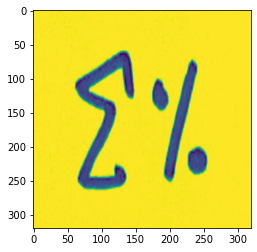

Label:  95
         xmin       ymin        xmax        ymax  confidence  class       name
1   61.982784  64.063072  145.519287  260.065277    0.568850      9  summation
2   64.206863  61.714958  256.193176  254.219299    0.282914      5    percent
0  177.037720  68.686218  254.921478  250.224792    0.746651      5    percent
Number of predictions:  3 Prediction:  955


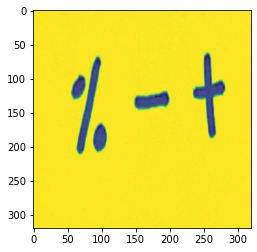

Label:  532
         xmin       ymin        xmax        ymax  confidence  class       name
0   56.526993  69.036316  105.059128  209.511963    0.895083      5    percent
2  148.452972  63.257492  285.462067  188.995773    0.358098      2  plus sign
1  231.756927  64.190079  283.223724  186.487473    0.781286      2  plus sign
Number of predictions:  3 Prediction:  522


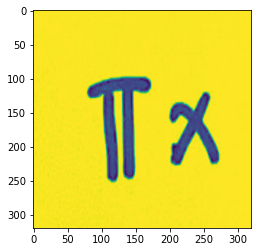

Label:  70
         xmin        ymin        xmax        ymax  confidence  class     name
1   80.298042   97.779320  175.909027  250.467926    0.652518      7  product
0  201.191162  116.374405  272.556213  229.977036    0.867122      0        x
Number of predictions:  2 Prediction:  70


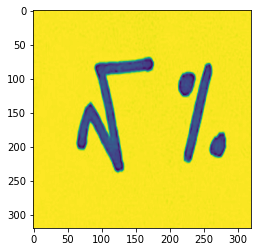

Label:  15
         xmin       ymin        xmax        ymax  confidence  class  \
1   64.542587  69.720512  191.752487  236.057800    0.844626      1   
0  213.874268  78.260918  281.759857  222.938904    0.894717      5   

          name  
1  square root  
0      percent  
Number of predictions:  2 Prediction:  15


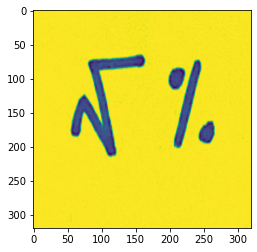

Label:  15
         xmin       ymin        xmax        ymax  confidence  class  \
1   56.480350  66.656868  162.703217  213.122803    0.880812      1   
0  199.954742  73.420647  265.301727  200.581787    0.904393      5   

          name  
1  square root  
0      percent  
Number of predictions:  2 Prediction:  15


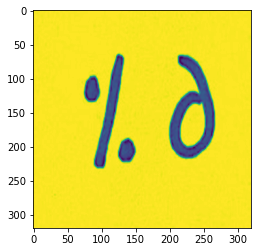

Label:  56
         xmin       ymin        xmax        ymax  confidence  class     name
0   75.665703  67.635124  148.337524  229.999603    0.932445      5  percent
1  200.679504  65.461365  266.386719  218.345032    0.870919      6  partial
Number of predictions:  2 Prediction:  56


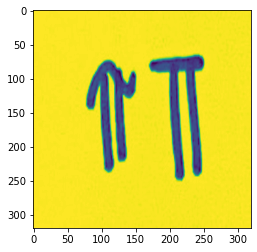

Label:  87
        xmin       ymin        xmax        ymax  confidence  class name
0  75.518089  69.670616  244.226837  245.114594    0.693361      8   pi
1  78.109680  73.028549  150.185394  235.768082    0.617249      8   pi
Number of predictions:  2 Prediction:  88


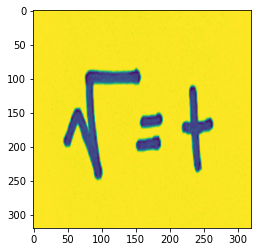

Label:  142
         xmin        ymin        xmax        ymax  confidence  class  \
1   45.824211   85.280441  158.398682  247.145645    0.369483      1   
0  221.237152  110.971909  264.052643  236.564407    0.736223      2   

          name  
1  square root  
0    plus sign  
Number of predictions:  2 Prediction:  12


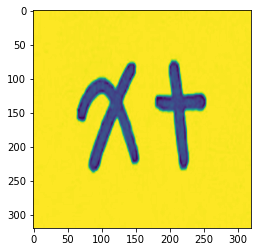

Label:  02
         xmin       ymin        xmax        ymax  confidence  class       name
1   65.182297  75.420242  155.804367  237.234879    0.666042      0          x
0  180.292419  73.049286  253.910675  233.342377    0.857402      2  plus sign
Number of predictions:  2 Prediction:  02


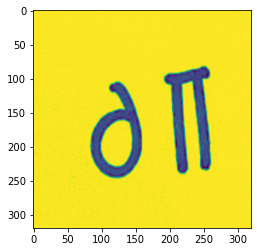

Label:  67
         xmin        ymin        xmax        ymax  confidence  class     name
0   85.044388  105.040276  158.833893  244.872101    0.548473      6  partial
2   85.342728   83.750854  264.643005  244.753479    0.265420      8       pi
1  193.851608   83.180618  260.791779  237.863510    0.498264      7  product
Number of predictions:  3 Prediction:  687


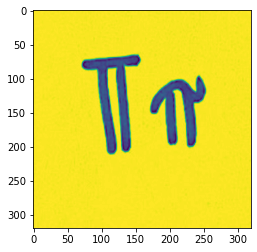

Label:  78
        xmin       ymin        xmax        ymax  confidence  class name
0  72.814537  65.595024  252.382202  208.310364    0.913724      8   pi
Number of predictions:  1 Prediction:  8


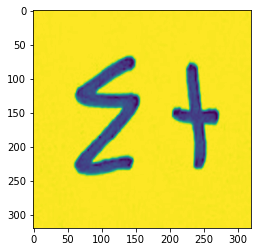

Label:  92
         xmin       ymin        xmax        ymax  confidence  class       name
1   60.361320  67.590569  155.811401  240.665680    0.933482      9  summation
0  205.371353  77.584801  272.093475  231.422638    0.949284      2  plus sign
Number of predictions:  2 Prediction:  92


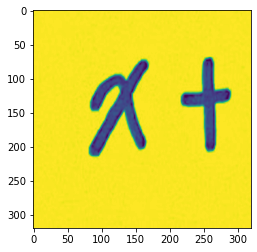

Label:  02
         xmin       ymin        xmax        ymax  confidence  class       name
1   83.487434  73.442726  169.326416  213.263580    0.933329      0          x
0  217.797531  69.380531  289.111877  206.583435    0.955323      2  plus sign
Number of predictions:  2 Prediction:  02


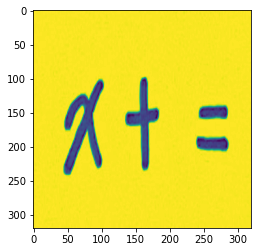

Label:  024
         xmin        ymin        xmax        ymax  confidence  class  \
2   45.805786  102.534897  103.130005  240.646286    0.824888      0   
1  136.246506   99.159180  184.581741  233.223999    0.842738      2   
0  240.911804  140.347031  287.349060  205.196091    0.916834      4   

        name  
2          x  
1  plus sign  
0      equal  
Number of predictions:  3 Prediction:  024


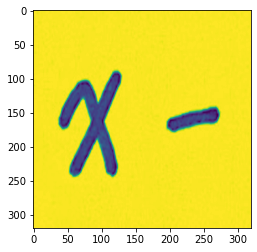

Label:  03
         xmin        ymin        xmax        ymax  confidence  class  \
0   38.077934   89.066147  129.211365  243.709488    0.934104      0   
1  197.404785  142.861160  272.881561  177.056992    0.794554      3   

            name  
0              x  
1  negative sign  
Number of predictions:  2 Prediction:  03


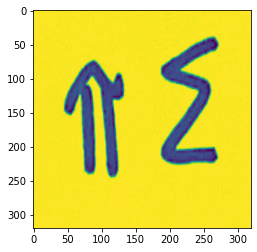

Label:  89
         xmin       ymin        xmax        ymax  confidence  class       name
1   45.420715  75.347153  133.363678  241.738388    0.774926      8         pi
0  186.623993  40.649475  271.967804  225.548340    0.895033      9  summation
Number of predictions:  2 Prediction:  89


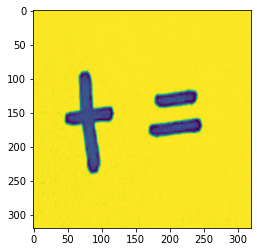

Label:  24
         xmin        ymin        xmax        ymax  confidence  class  \
0   46.799549   90.594376  118.035812  238.223099    0.934401      2   
1  170.698959  117.498688  247.373337  184.632660    0.929599      4   

        name  
0  plus sign  
1      equal  
Number of predictions:  2 Prediction:  24


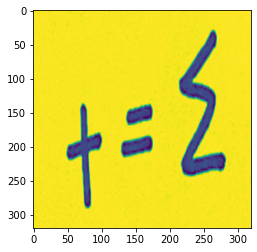

Label:  249
         xmin        ymin        xmax        ymax  confidence  class  \
0   50.013290  138.134705   98.713409  289.403931    0.800535      2   
2  131.296509  139.294922  175.170441  214.981506    0.319658      4   
1  136.215820   29.671608  284.111511  242.458618    0.571609      9   

        name  
0  plus sign  
2      equal  
1  summation  
Number of predictions:  3 Prediction:  249


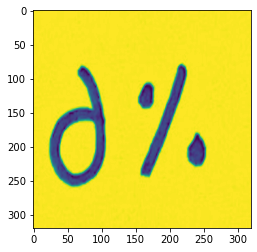

Label:  65
         xmin       ymin        xmax        ymax  confidence  class     name
2   21.904335  80.057304  252.296875  256.888641    0.350845      5  percent
1   25.272362  83.096947  104.808998  255.826263    0.725195      6  partial
0  155.537460  80.151779  252.884445  243.877365    0.922774      5  percent
Number of predictions:  3 Prediction:  565


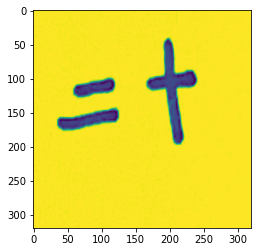

Label:  42
         xmin        ymin        xmax        ymax  confidence  class  \
1   36.268345  101.246246  124.537567  174.715546    0.895211      4   
0  167.448166   41.699883  239.798599  195.318451    0.928446      2   

        name  
1      equal  
0  plus sign  
Number of predictions:  2 Prediction:  42


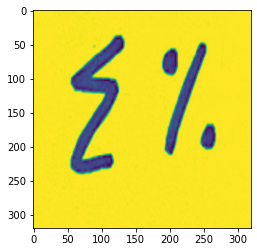

Label:  95
         xmin       ymin        xmax        ymax  confidence  class       name
1   54.758980  37.967659  132.761108  236.799591    0.843874      9  summation
0  189.350403  49.048660  266.572052  210.804153    0.924119      5    percent
Number of predictions:  2 Prediction:  95


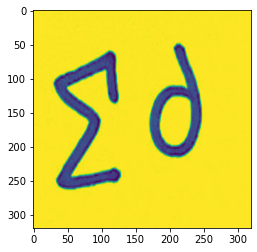

Label:  96
         xmin       ymin        xmax        ymax  confidence  class       name
0   29.324230  60.085876  127.414795  261.436523    0.947091      9  summation
1  173.585205  49.139107  246.851440  214.586761    0.895185      6    partial
Number of predictions:  2 Prediction:  96


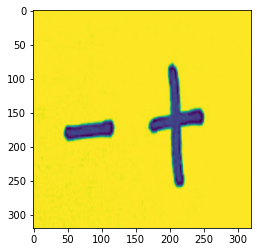

Label:  32
         xmin        ymin        xmax        ymax  confidence  class  \
1   45.774761  161.785538  116.536469  190.771164    0.590070      3   
0  170.305588   81.996590  250.109512  259.847137    0.927707      2   

            name  
1  negative sign  
0      plus sign  
Number of predictions:  2 Prediction:  32


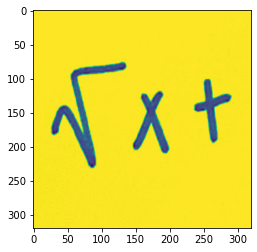

Label:  102
         xmin        ymin        xmax        ymax  confidence  class  \
1   27.665665   76.123634  132.885483  230.392578    0.890910      1   
2  148.742264  118.797516  198.624496  208.797882    0.864015      0   
0  237.440186  101.415894  289.802185  199.702393    0.913855      2   

          name  
1  square root  
2            x  
0    plus sign  
Number of predictions:  3 Prediction:  102


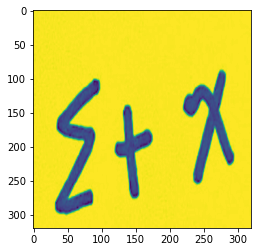

Label:  920
         xmin        ymin        xmax        ymax  confidence  class name
1   32.279999  101.986450  176.944794  294.868805    0.282352      8   pi
0  220.785217   87.848396  294.592407  253.959900    0.920973      0    x
Number of predictions:  2 Prediction:  80


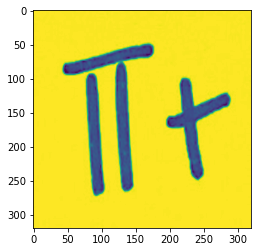

Label:  72
         xmin       ymin        xmax        ymax  confidence  class       name
1   43.878510  48.774010  174.576675  269.633148    0.455405      7    product
0  195.691345  99.212563  288.886200  248.850555    0.666423      2  plus sign
Number of predictions:  2 Prediction:  72


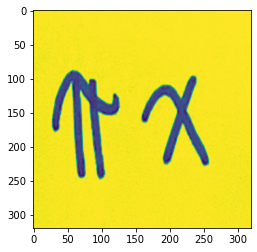

Label:  80
         xmin       ymin        xmax        ymax  confidence  class name
2   27.251900  88.340569  251.634644  245.285187    0.350923      8   pi
1   28.034550  89.010086  125.819489  245.803299    0.783741      8   pi
0  161.523026  97.012337  257.981842  228.258972    0.900576      0    x
Number of predictions:  3 Prediction:  880


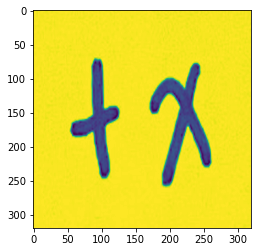

Label:  20
         xmin       ymin        xmax        ymax  confidence  class       name
1   55.367344  72.205124  125.869339  246.572556    0.872065      2  plus sign
0  172.454742  77.345726  260.660248  257.330933    0.939234      0          x
Number of predictions:  2 Prediction:  20


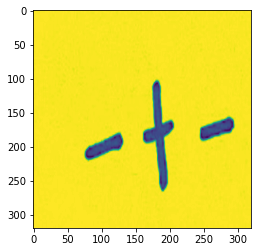

Label:  323
        xmin        ymin        xmax        ymax  confidence  class       name
0  75.290176  103.303055  294.858093  264.801575    0.925023      2  plus sign
Number of predictions:  1 Prediction:  2


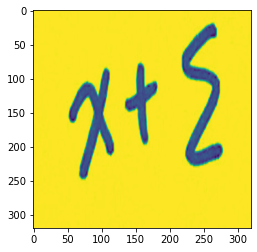

Label:  029
       xmin       ymin       xmax        ymax  confidence  class name
0  52.09782  79.287888  174.56749  246.724411    0.757427      0    x
Number of predictions:  1 Prediction:  0


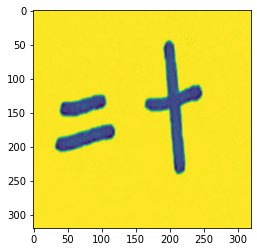

Label:  42
         xmin        ymin        xmax        ymax  confidence  class  \
0   32.632435  124.394806  118.789703  206.104401    0.919687      4   
1  164.578766   47.822517  247.596802  234.963593    0.916911      2   

        name  
0      equal  
1  plus sign  
Number of predictions:  2 Prediction:  42


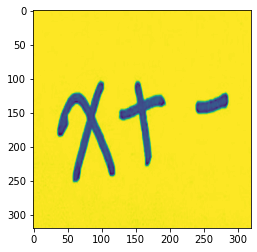

Label:  023
         xmin        ymin        xmax        ymax  confidence  class  \
0   36.065674  103.334229  192.998627  251.471527    0.894721      0   
1  238.492630  121.946396  286.271362  151.104263    0.449102      3   
2  240.383347  119.856293  286.428680  154.699249    0.332780      2   

            name  
0              x  
1  negative sign  
2      plus sign  
Number of predictions:  3 Prediction:  032


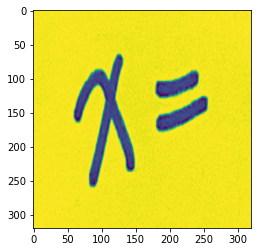

Label:  04
         xmin       ymin        xmax        ymax  confidence  class   name
0   60.275894  64.904922  148.203918  257.316467    0.817876      0      x
1  180.545425  89.046104  255.985703  176.124207    0.783638      4  equal
Number of predictions:  2 Prediction:  04


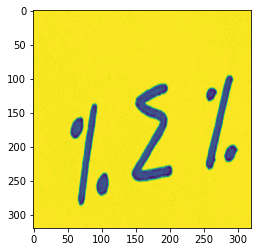

Label:  595
         xmin        ymin        xmax        ymax  confidence  class  \
1   54.508545  137.077393  108.257523  285.133911    0.902155      5   
2  147.797150  108.154579  202.124908  254.220062    0.511067      9   
0  253.021423   96.308823  297.817566  235.066544    0.912154      5   

        name  
1    percent  
2  summation  
0    percent  
Number of predictions:  3 Prediction:  595


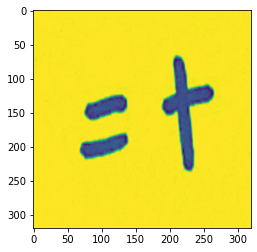

Label:  42
         xmin        ymin        xmax       ymax  confidence  class       name
1   68.953796  125.561401  137.757080  217.66156    0.887622      4      equal
0  190.048752   67.133339  264.596741  234.70813    0.913072      2  plus sign
Number of predictions:  2 Prediction:  42


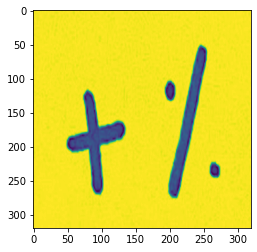

Label:  25
         xmin        ymin        xmax        ymax  confidence  class  \
1   49.564682  118.128784  133.827393  269.839294    0.897595      2   
0  193.307281   51.446205  273.071777  273.746368    0.923460      5   

        name  
1  plus sign  
0    percent  
Number of predictions:  2 Prediction:  25


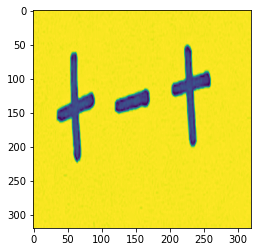

Label:  232
         xmin       ymin        xmax        ymax  confidence  class       name
2   30.933128  56.168777  263.644287  221.413101    0.267635      2  plus sign
1   33.613762  62.287231  104.019997  222.625336    0.700044      2  plus sign
0  205.263931  51.394676  260.057007  198.966187    0.877699      2  plus sign
Number of predictions:  3 Prediction:  222


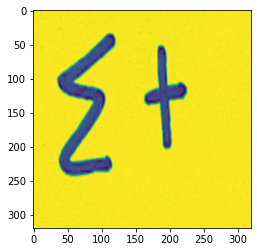

Label:  92
         xmin       ymin        xmax        ymax  confidence  class       name
1   34.694496  35.267754  125.250145  240.782440    0.708858      9  summation
0  163.935013  52.035110  224.772476  201.980896    0.910694      2  plus sign
Number of predictions:  2 Prediction:  92


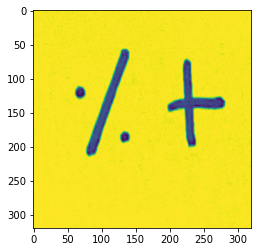

Label:  52
         xmin       ymin        xmax        ymax  confidence  class       name
0   61.873455  58.220207  140.737152  212.431183    0.949954      5    percent
1  198.463806  72.898117  281.445862  199.360397    0.931002      2  plus sign
Number of predictions:  2 Prediction:  52


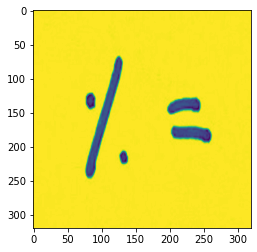

Label:  54
         xmin        ymin        xmax        ymax  confidence  class     name
0   76.678246   68.465981  137.177261  245.804016    0.922338      5  percent
1  197.333527  129.542313  261.048950  193.415176    0.909638      4    equal
Number of predictions:  2 Prediction:  54


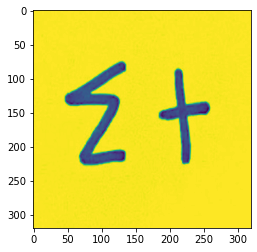

Label:  92
         xmin       ymin        xmax        ymax  confidence  class       name
1   47.000458  75.657974  136.157867  225.866898    0.938708      9  summation
0  185.756882  85.693115  259.147217  225.677490    0.955931      2  plus sign
Number of predictions:  2 Prediction:  92


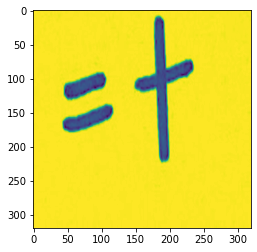

Label:  42
         xmin       ymin        xmax        ymax  confidence  class       name
1   43.510220  91.512405  116.225403  177.033340    0.849443      4      equal
0  149.391205   9.833115  234.275574  219.533493    0.862028      2  plus sign
Number of predictions:  2 Prediction:  42


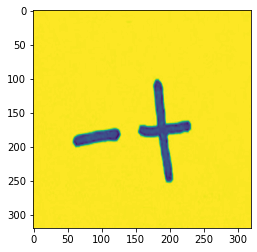

Label:  32
         xmin        ymin        xmax        ymax  confidence  class  \
1   58.224121  101.683754  233.696442  251.497040    0.771949      2   
0  155.830109  102.584946  231.366974  251.914932    0.792064      2   

        name  
1  plus sign  
0  plus sign  
Number of predictions:  2 Prediction:  22


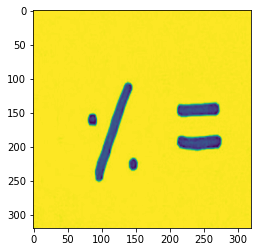

Label:  54
         xmin        ymin        xmax        ymax  confidence  class     name
0   81.166931  106.831192  152.025558  250.973679    0.948323      5  percent
1  211.584351  136.279755  276.179260  204.041992    0.913910      4    equal
Number of predictions:  2 Prediction:  54


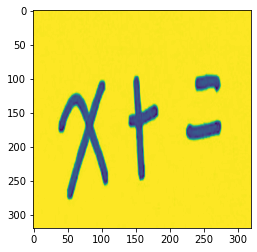

Label:  024
         xmin       ymin        xmax        ymax  confidence  class   name
1   41.939064  99.893669  142.902832  276.781555    0.740865      0      x
0  226.695007  95.479103  275.973053  189.816803    0.884709      4  equal
Number of predictions:  2 Prediction:  04
Acc: 0.6183
Testing complete in 0m 22s


(AutoShape(
   (model): DetectMultiBackend(
     (model): DetectionModel(
       (model): Sequential(
         (0): Conv(
           (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
           (act): SiLU(inplace=True)
         )
         (1): Conv(
           (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
           (act): SiLU(inplace=True)
         )
         (2): C3(
           (cv1): Conv(
             (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
             (act): SiLU(inplace=True)
           )
           (cv2): Conv(
             (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
             (act): SiLU(inplace=True)
           )
           (cv3): Conv(
             (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
             (act): SiLU(inplace=True)
           )
           (m): Sequential(
             (0): Bottleneck(
               (cv1): Conv(
                 (conv): Conv2d(32, 32, kernel_s

In [106]:
test_model(model_ft, dataset, labels)